# Introduction

This notebook will focus primarily statistical side of the time series modelling, including how to define Correlation's, the concept of Stationarity, Auto-Correlation & Partial Auto-Correlation Function, Auto-Regressive & Moving Average Processes in modelling and how to perform Model Diagnostics.

<b>Interesting Read : </b>[Engineering Statistics Handbook](https://www.itl.nist.gov/div898/handbook/index.htm)

<img src='../../Materials/Engineering Statistic Handbook - Cover.png' width='250' align='left'>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

[R - Libraries : Some useful libraries and components for Time Series Analysis in R - by Rob.J.Hyndman](https://cran.r-project.org/web/views/TimeSeries.html)

# Imports

In [1041]:
# General
from warnings import filterwarnings
filterwarnings('ignore')
from cycler import cycler


# Data Wrangling
import pandas as pd
import numpy as np

# Data Viualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpl

# Time Series Specific
from statsmodels.tsa.seasonal import seasonal_decompose


# Datetime
from datetime import datetime

# Path and Variable Initialisation

In [1525]:
root_path = '../../'
raw_datapath = root_path+'Raw Data/'
prepared_datapath = root_path+'Prepared Data/'

# Consumer Price Index for India with Groups and Subgroups
cpi_datapath = raw_datapath+'cpi_states_and_groups.csv'
# Total Air Passengers
airpassengers_datapath = raw_datapath+'AirPassengers.csv'
# Total Air Passengers
houseprices_datapath = raw_datapath+'Housing_data_prices.csv'
# Australlian Monthly Beer Production
beerprod_datapath = raw_datapath+'Australlian_Monthly_Beer_Production.csv'
# Britannia Stock Prices
britanniastock_datapath = raw_datapath+'BRITANNIA.NS.csv'
# Air Gap Data
airgap_datapath = raw_datapath+'airGap.csv'
# Housing Prices with Missing Data
housepmiss_datapath = raw_datapath+'housing-with-missing-value.csv'
# Monthly Milk production
milkprod_datapath = raw_datapath+'monthly-milk-production-pounds.csv'
# Population and Energy Consumption
popenergy_datapath = raw_datapath+'global_pop_energy.csv'
# USA CPI
usacpi_datapath = raw_datapath+'USA_CPI.csv'
# AntiDiabetic DrugSales
antidiabetic_datapath = raw_datapath+'AntiDiabetic_DrugSales_Mn.csv'
# Australlian Electricity Priduction
elecprod_datapath = raw_datapath+'Australlian_Monthly_Electricity_Production_BillionKWh.csv'
# AntiDiabetic DrugSales
antidiabetic_datapath = raw_datapath+'AntiDiabetic_DrugSales_Mn.csv'
# Australlian Visitors
visitors5r_datapath = raw_datapath+'Australlia_Vistors_5Regions_Million.csv'

In [592]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (15,7)
plt.style.use('dark_background')
# plt.style.use('ggplot')

# Reading Datasets

In [1527]:
cpi_data = pd.read_csv(cpi_datapath, header=[1])

airpassengers_data = pd.read_csv(airpassengers_datapath, index_col=0, parse_dates=True)

houseprices_data = pd.read_csv(houseprices_datapath, index_col=0)

beerprod_data = pd.read_csv(beerprod_datapath, index_col=0, parse_dates=True)

britanniastock_data = pd.read_csv(britanniastock_datapath, index_col=0, parse_dates=True)

housepmiss_data = pd.read_csv(housepmiss_datapath, index_col=0)

milkprod_data = pd.read_csv(milkprod_datapath, index_col=0)

popenergy_data = pd.read_csv(popenergy_datapath, index_col=0, parse_dates=True)

usacpi_data = pd.read_csv(usacpi_datapath, index_col=0, parse_dates=True)

visitors5r_data = pd.read_csv(visitors5r_datapath, index_col=0, parse_dates=True)

# Processing Data

## India - Consumer Price Index Data

In [192]:
cpi_data=cpi_data.reset_index()
cpi_data=cpi_data.drop(['index', 'Group', 'Sub Group', 'Status'], axis=1) # Unrequired Columns
cpi_data=cpi_data.dropna(how='all', axis=1)
cpi_data['Month']=pd.to_datetime(cpi_data.Month, format='%B').dt.month
cpi_data['Day']='01'
# Create Date
cpi_data['Date'] = pd.to_datetime(cpi_data[['Year', 'Month', 'Day']])
cpi_data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
cpi_data.head()

,State,Description,Rural,Urban,Combined,Date
0,ALL India,Cereals and products,107.5,110.5,108.4,2013-01-01
1,Andhra Pradesh,Cereals and products,111.0,115.0,112.2,2013-01-01
2,Assam,Cereals and products,103.9,105.6,104.1,2013-01-01
3,Bihar,Cereals and products,107.3,110.2,107.6,2013-01-01
4,Chhattisgarh,Cereals and products,103.2,109.3,104.9,2013-01-01


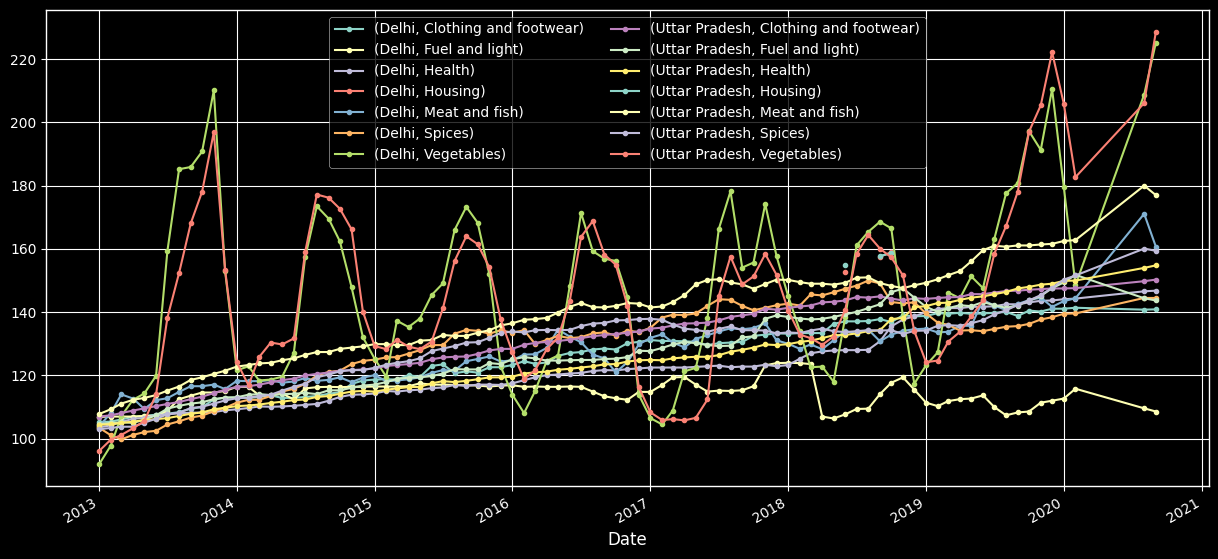

In [197]:
pltdata=cpi_data.set_index('Date').copy()
pltdata=pltdata[pltdata.State.isin(['Delhi', 'Uttar Pradesh'])]
pltdata=pltdata[pltdata.Description.isin(['Health', 'Meat and fish', 'Spices',
                                    'Clothing and footwear', 'Housing',
                                    'Fuel and light','Vegetables'])]

_=pltdata.groupby(['State', 'Description']).Combined.plot(legend=True, marker='o', markersize=3)
_=plt.legend(ncol=2)

## Air Passengers Data

In [855]:
pd.infer_freq(airpassengers_data.index)

'MS'

In [856]:
airpassengers_data.index=pd.PeriodIndex(airpassengers_data.index, freq='M')
airpassengers_data.index[:3]

PeriodIndex(['1949-01', '1949-02', '1949-03'], dtype='period[M]', name='Month', freq='M')

In [857]:
airpassengers_data.columns = ['Passengers']
airpassengers_data.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


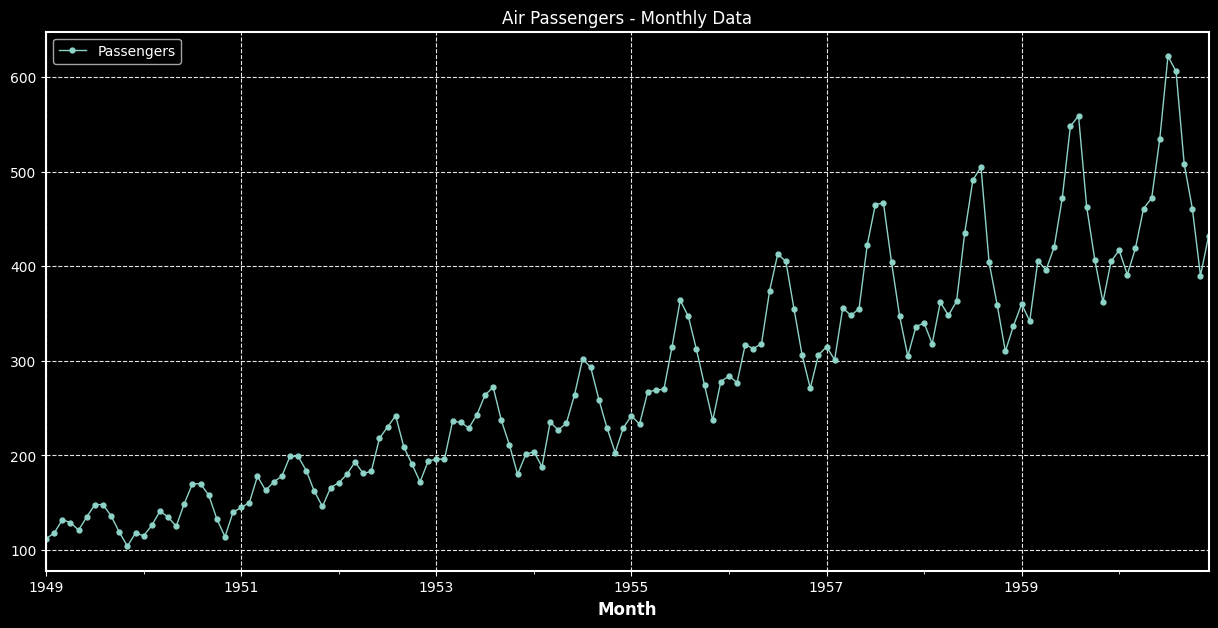

In [858]:
_=airpassengers_data.plot(marker='o', markersize=3.5,
                          title='Air Passengers - Monthly Data')

## Monthly Beer Production

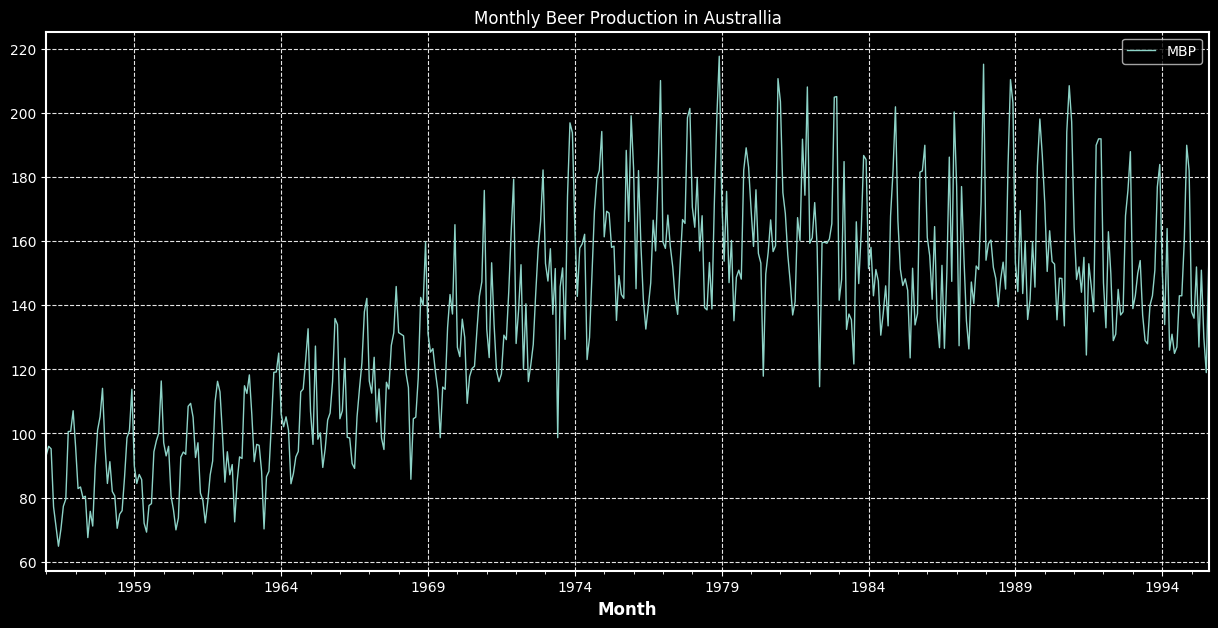

In [1321]:
beerprod_data.columns = ['MBP']
_=beerprod_data.plot(title='Monthly Beer Production in Australlia')

## Housing Prices Data

In [1355]:
houseprices_data = houseprices_data.drop(['RegionID', 'SizeRank', 'StateName'], axis=1)
houseprices_data = houseprices_data[~houseprices_data.RegionName.duplicated()]
houseprices_data = houseprices_data.melt(id_vars='RegionName')
houseprices_data.columns=['Region', 'Month', 'Price']
houseprices_data.head()

,Region,Month,Price
0,New York,2008-03,NaN
1,Los Angeles,2008-03,507600.0
2,Houston,2008-03,138400.0
3,Chicago,2008-03,325100.0
4,San Antonio,2008-03,130900.0


<b>Finding Those regions which are present in each month</b>

In [1356]:
persistent_regions = set(houseprices_data.Region.unique())
len(persistent_regions)

3158

In [1357]:
def find_regions(x):
    global persistent_regions
    persistent_regions = persistent_regions.difference(persistent_regions.difference(x))
_=houseprices_data.dropna().groupby('Month').Region.apply(set).apply(lambda x : find_regions(x))

In [1358]:
len(persistent_regions)

744

In [1359]:
print('Shape Before : ', houseprices_data.shape)
houseprices_data=houseprices_data[houseprices_data.Region.isin(persistent_regions)].copy()
print('Shape After : ', houseprices_data.shape)

Shape Before :  (457910, 3)
Shape After :  (107880, 3)


In [1360]:
houseprices_data.set_index(['Region', 'Month']).sort_index(level=0)

Price
Region   Month            
Abingdon 2008-03  261100.0
         2008-04  263700.0
         2008-05  248900.0
         2008-06  239300.0
         2008-07  232800.0
...                    ...
Zeeland  2019-11  219500.0
         2019-12  214900.0
         2020-01  222900.0
         2020-02  227600.0
         2020-03  233000.0

[107880 rows x 1 columns]

In [1361]:
houseprices_data.index = pd.PeriodIndex(houseprices_data.Month, freq='M')
houseprices_data.drop('Month', axis=1, inplace=True)
houseprices_data.head()

,Region,Price
Month,,
2008-03,Chicago,325100.0
2008-03,Las Vegas,244400.0
2008-03,Dallas,148400.0
2008-03,Columbus,116000.0
2008-03,Louisville,124800.0


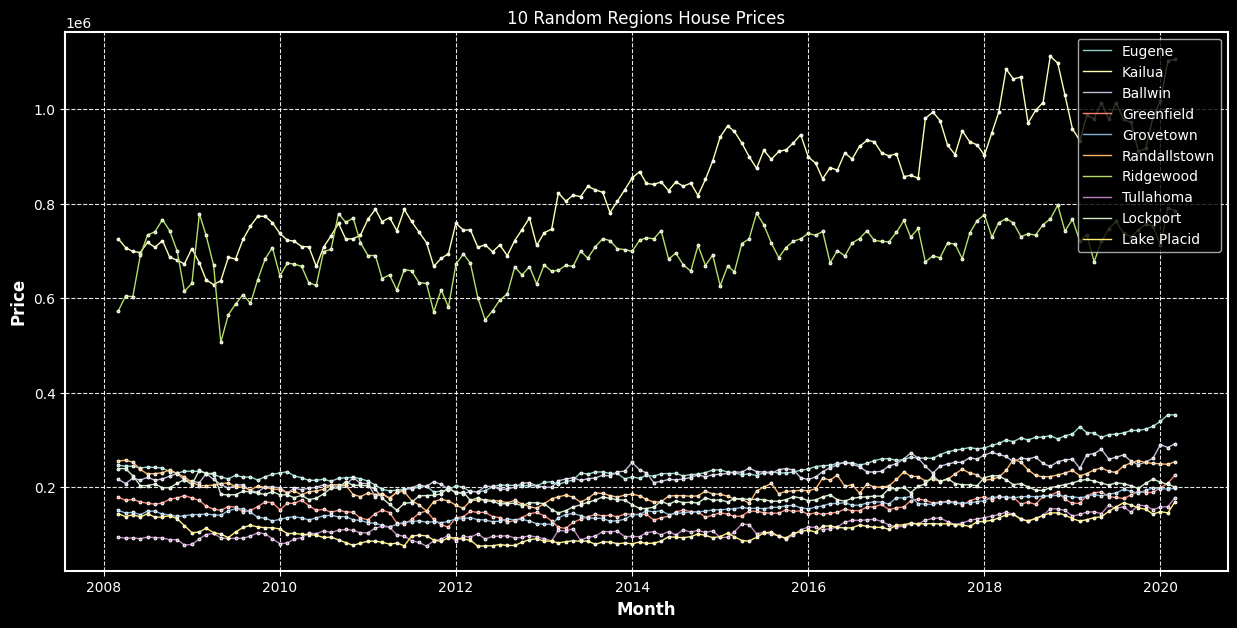

In [1362]:
pltdata = houseprices_data.copy()
random_regions = np.random.choice(pltdata.Region,10) # Pick 10 random regions
pltdata.index = pltdata.index.to_timestamp()
pltdata = pltdata[pltdata.Region.isin(random_regions)]
_=sns.lineplot(x='Month', y='Price', data=pltdata, hue='Region',
               marker='o', markersize=2)
_=plt.legend(loc=1)
_=plt.title('10 Random Regions House Prices')

## Britannia's Stock Prices

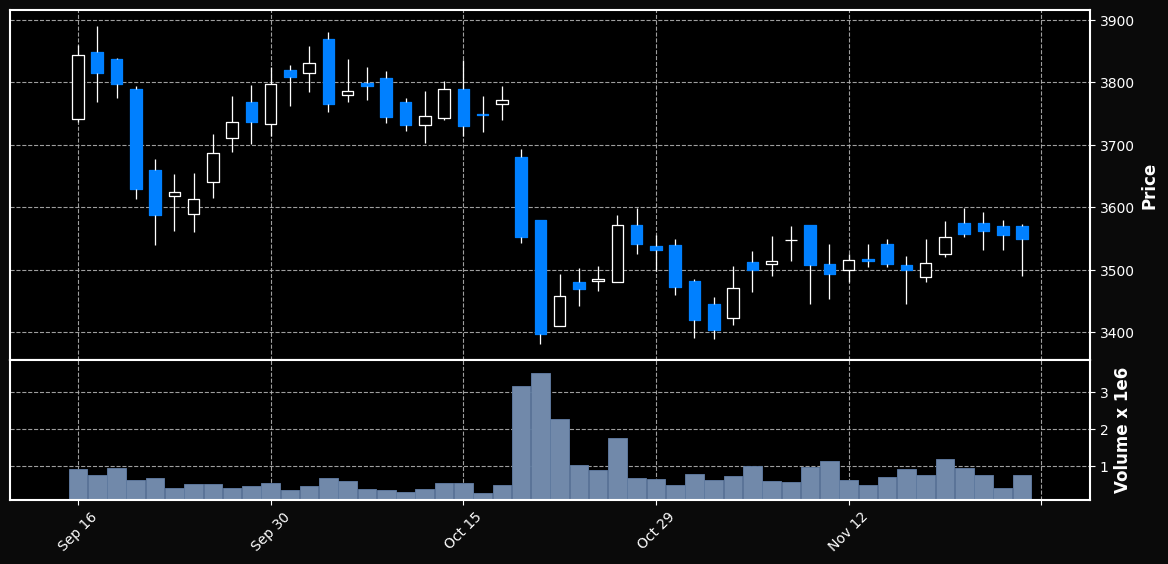

In [547]:
britanniastock_data = britanniastock_data[['Open', 'High', 'Low', 'Close', 'Volume']].copy()
britanniastock_data=britanniastock_data.dropna()
mpl.plot(britanniastock_data[-50:], figsize=(15,7),
         type='candle', volume=True, style='mike')


## Air Gap Data

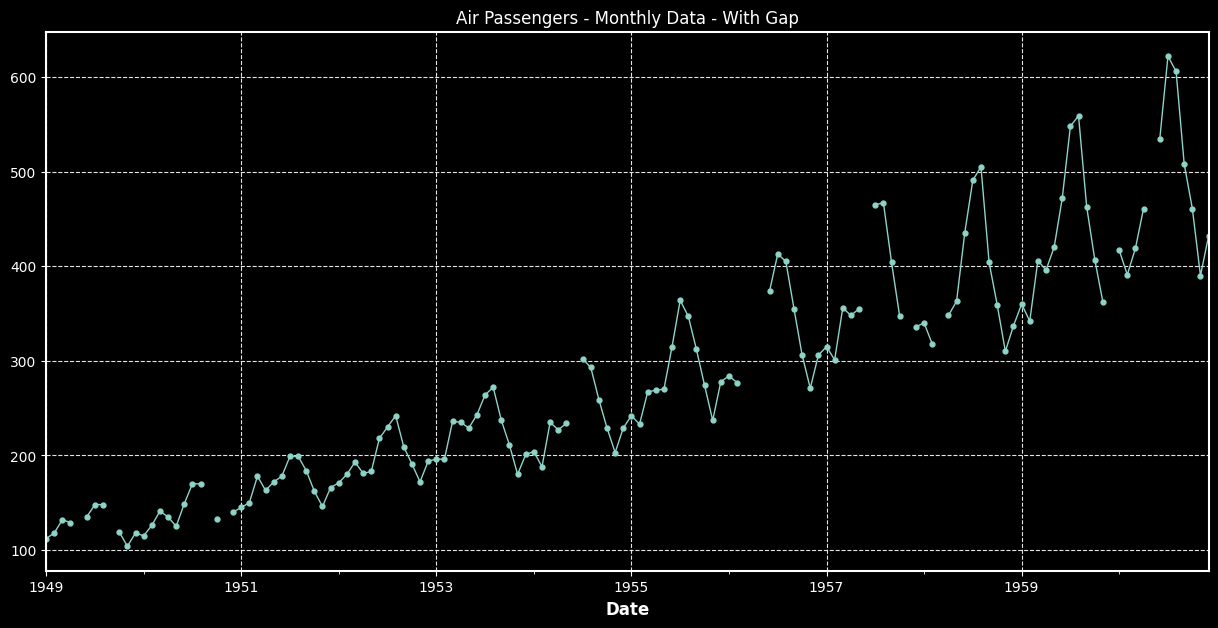

In [779]:
airgap_data = pd.read_csv(airgap_datapath, index_col=0, parse_dates=True)
airgap_data.columns = ['Passengers']
airgap_data.index.name = 'Date'
_=airgap_data.Passengers.plot(marker='o', markersize=3.5,
                              title='Air Passengers - Monthly Data - With Gap')

## Housing Data Gap

In [880]:
housepmiss_data = pd.read_csv(housepmiss_datapath, index_col=0)
housepmiss_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


## Milk Production Dataset

In [1325]:
milkprod_data.columns = ['MilkProductionPounds']
milkprod_data.index = pd.to_datetime(milkprod_data.index)
milkprod_data.head()

,MilkProductionPounds
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<AxesSubplot:xlabel='Month'>

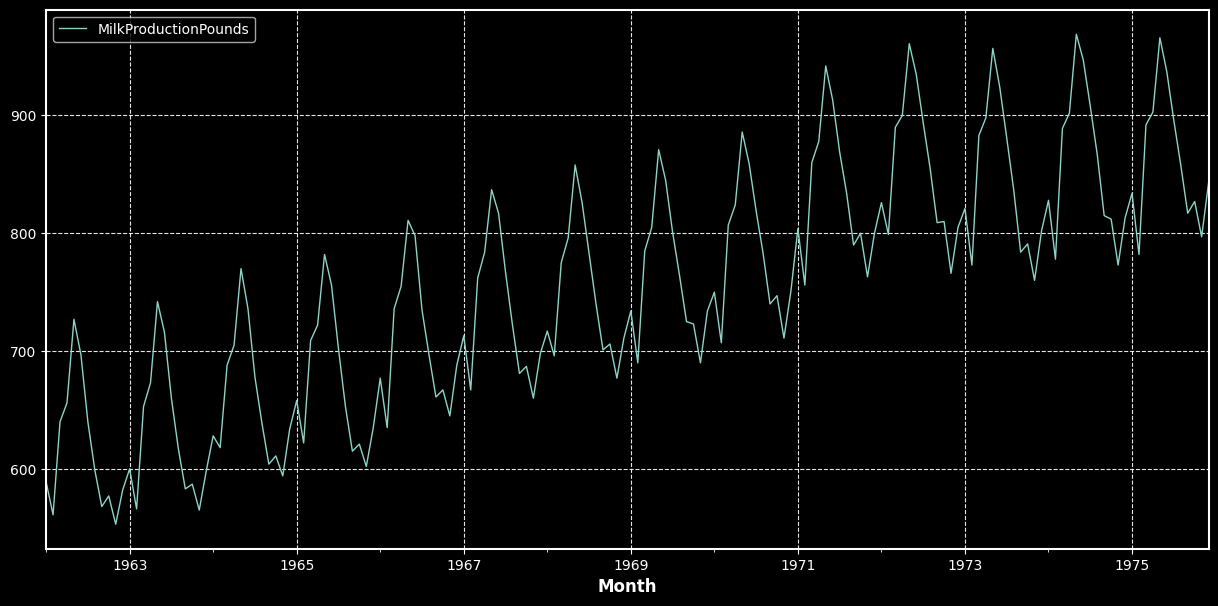

In [1326]:
milkprod_data.plot()

## Global Population and Energy Consumption Data

In [1233]:
popenergy_data.head()

,Population,Coal_TWh,Oil_TWh,Gas_TWh,Hydropower_TWh,Nuclear_TWh,Solar_TWh,OtherRenewables_TWh,TraditionalBiomass_TWh,Wind_TWh,Biofuels_TWh
1960-01-01,3.067248e+10,15442,11097,4472,689,0,0,0,8889,0,0
1965-01-01,3.372133e+10,16140,18109,6303,923,26,0,18,9162,0,0
1966-01-01,3.446703e+10,16324,19496,6869,984,34,0,20,9218,0,0
1967-01-01,3.520994e+10,16061,20891,7375,1006,41,0,20,9274,0,0
1968-01-01,3.596666e+10,16301,22675,8044,1059,52,0,22,9331,0,0


In [1234]:
popenergy_data['Renewable_Energy_TWh'] = popenergy_data[['Hydropower_TWh', 'Solar_TWh',
                                                        'OtherRenewables_TWh', 'TraditionalBiomass_TWh',
                                                        'Wind_TWh', 'Biofuels_TWh']].sum(axis=1)
popenergy_data['NonRenewable_Energy_TWh'] = popenergy_data[['Coal_TWh', 'Oil_TWh', 'Gas_TWh']].sum(axis=1)
popenergy_data['Nuclear_Energy_TWh'] = popenergy_data[['Nuclear_TWh']]
popenergy_data = popenergy_data[['Population', 'Renewable_Energy_TWh', 'NonRenewable_Energy_TWh', 'Nuclear_Energy_TWh']]
popenergy_data.head()

,Population,Renewable_Energy_TWh,NonRenewable_Energy_TWh,Nuclear_Energy_TWh
1960-01-01,3.067248e+10,9578,31011,0
1965-01-01,3.372133e+10,10103,40552,26
1966-01-01,3.446703e+10,10222,42689,34
1967-01-01,3.520994e+10,10300,44327,41
1968-01-01,3.596666e+10,10412,47020,52


## USA Consumer Price Index

In [1363]:
usacpi_data.index.name = 'Date'
usacpi_data.columns = ['CPI']
usacpi_data.head()

,CPI
Date,
2007-10-01,209.190
2007-11-01,210.834
2007-12-01,211.445
2008-01-01,212.174
2008-02-01,212.687


<AxesSubplot:xlabel='Date'>

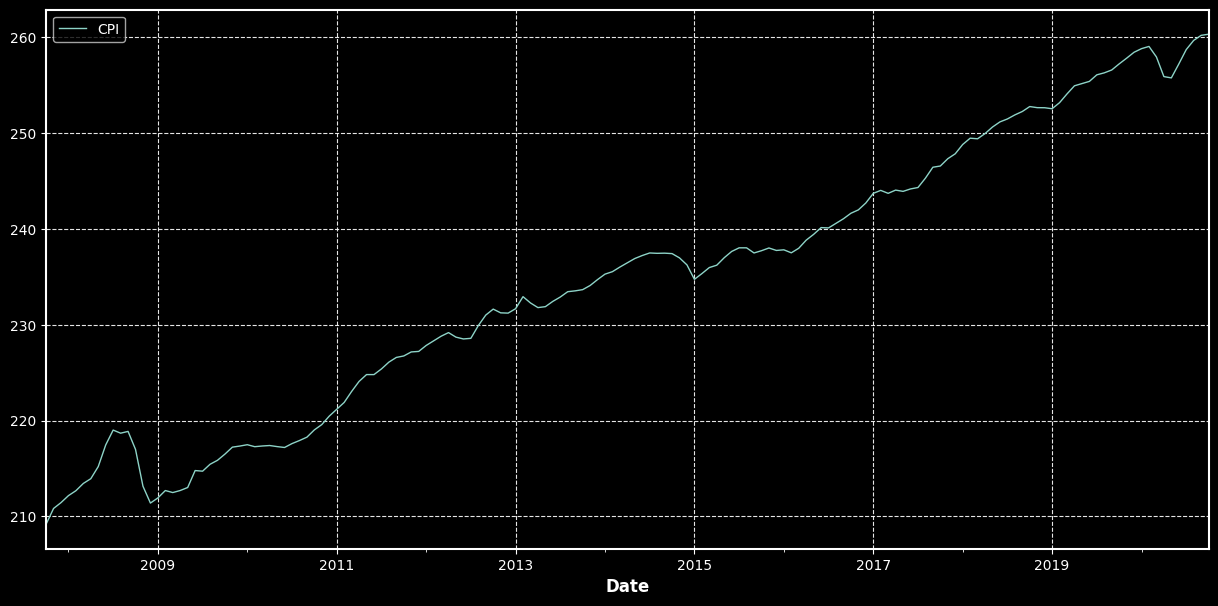

In [1364]:
usacpi_data.plot()

## AntiDiabetic DrugSales

In [1331]:
antidiabetic_data = pd.read_csv(antidiabetic_datapath, index_col=0, parse_dates=True)
antidiabetic_data.head()

,value
index,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


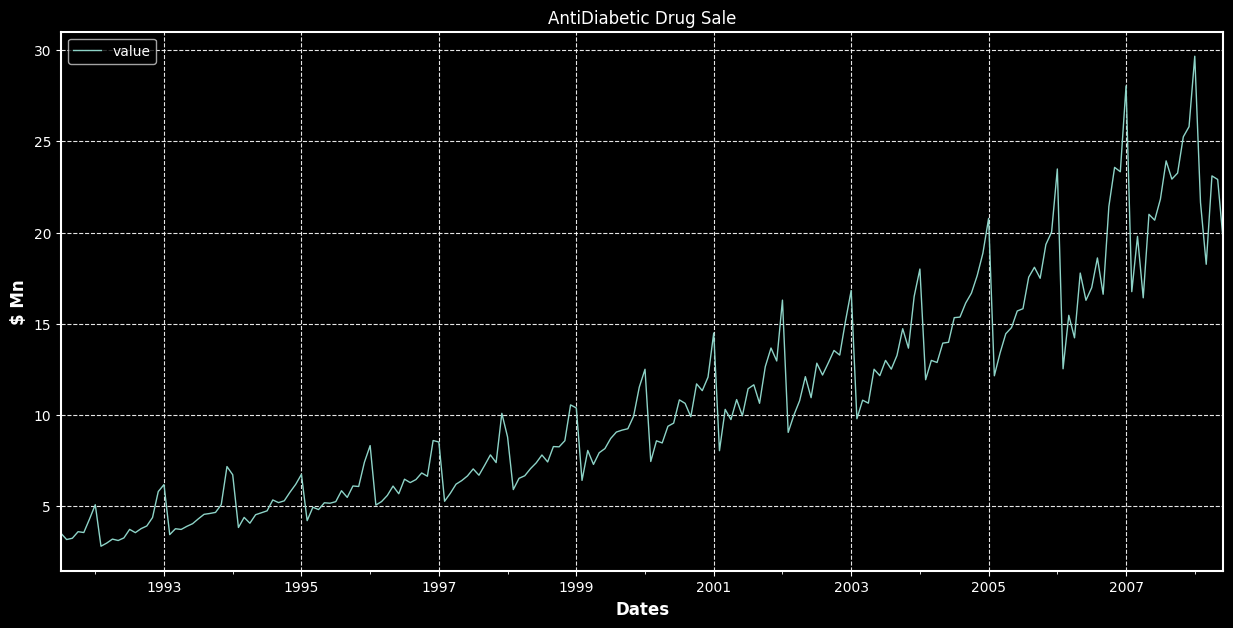

In [1341]:
_=antidiabetic_data.plot(title='AntiDiabetic Drug Sale')
_=plt.ylabel('$ Mn')
_=plt.xlabel('Dates')

## Australlian Electricity Priduction

In [1337]:
elecprod_data = pd.read_csv(elecprod_datapath, index_col=0, parse_dates=True)
elecprod_data.head()

,value
index,
1956-01-01,1254
1956-02-01,1290
1956-03-01,1379
1956-04-01,1346
1956-05-01,1535


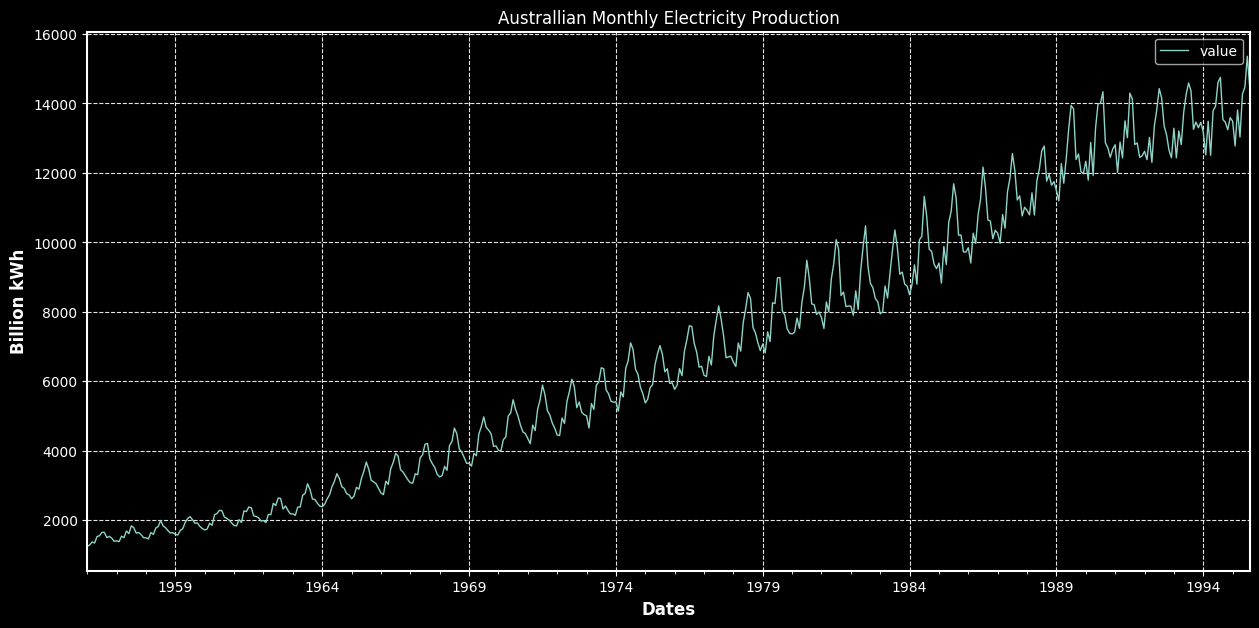

In [1342]:
_=elecprod_data.plot(title='Australlian Monthly Electricity Production')
_=plt.ylabel('Billion kWh')
_=plt.xlabel('Dates')

## Australlia Visitors - 5 Regions

In [1544]:
visitors5r_data.index=pd.to_datetime(visitors5r_data.index.str.replace(' ',''))
visitors5r_data.columns = ['Regions', 'Visitors']
visitors5r_data.head()

,Regions,Visitors
index,,
1998-01-01,NSWMetro,9.047095
1998-04-01,NSWMetro,6.962126
1998-07-01,NSWMetro,6.871963
1998-10-01,NSWMetro,7.147293
1999-01-01,NSWMetro,7.956923


# Splitting Data

There is a need to split the data such that we land with three buckets of the Data:-

- Training Data
- Cross Validation Data
- Testing Data

# Simple Models

- Average Model
- Näive Model
- Seasonal Näive Model
- Drift Model


# AR & MA Processes

# ARMA Model

# ARIMA Model

# Linear Regression

# Random Testing Space